# Importamos las utilidades de `utils.py`


In [125]:
from utils import *
import networkx as nx
import matplotlib.pyplot as plt

# Obtenemos la info de los exchanges y cryptos


In [126]:
cryptocurrencys = read_json("data/json/cryptos_coinmarket_2024-04-16.json")
exchanges = read_json("metadata/exchanges_coinmarket.json")

In [127]:
exchanges = list(map(lambda exchange: exchange["name"], exchanges))

# Ahora creamos las relaciones que hay entre exchange y crypto


In [128]:
color_exchange = generate_rgb()
color_crypto = generate_rgb()
colors = []

In [129]:
exchanges_crypto_set: list[tuple] = []
crypto_names = set()

for category in cryptocurrencys:
    cryptos: list[dict] = cryptocurrencys[category]["coins"]
    for crypto in cryptos:
        crypto_names.add(crypto["symbol"])
        for exchange in crypto["exchanges"]["data"]:
            exchanges_crypto_set.append((crypto["symbol"], exchange["name"]))

In [130]:
len(exchanges_crypto_set)

13669

In [131]:
len(crypto_names)

1031

# Graficamos el grafo


In [132]:
G = nx.Graph()

In [133]:
G.add_edges_from(exchanges_crypto_set)

In [163]:
nodes_name = list(G.nodes.keys())
colors = list(
    map(
        lambda crypto: color_crypto if crypto in crypto_names else color_exchange,
        nodes_name,
    )
)

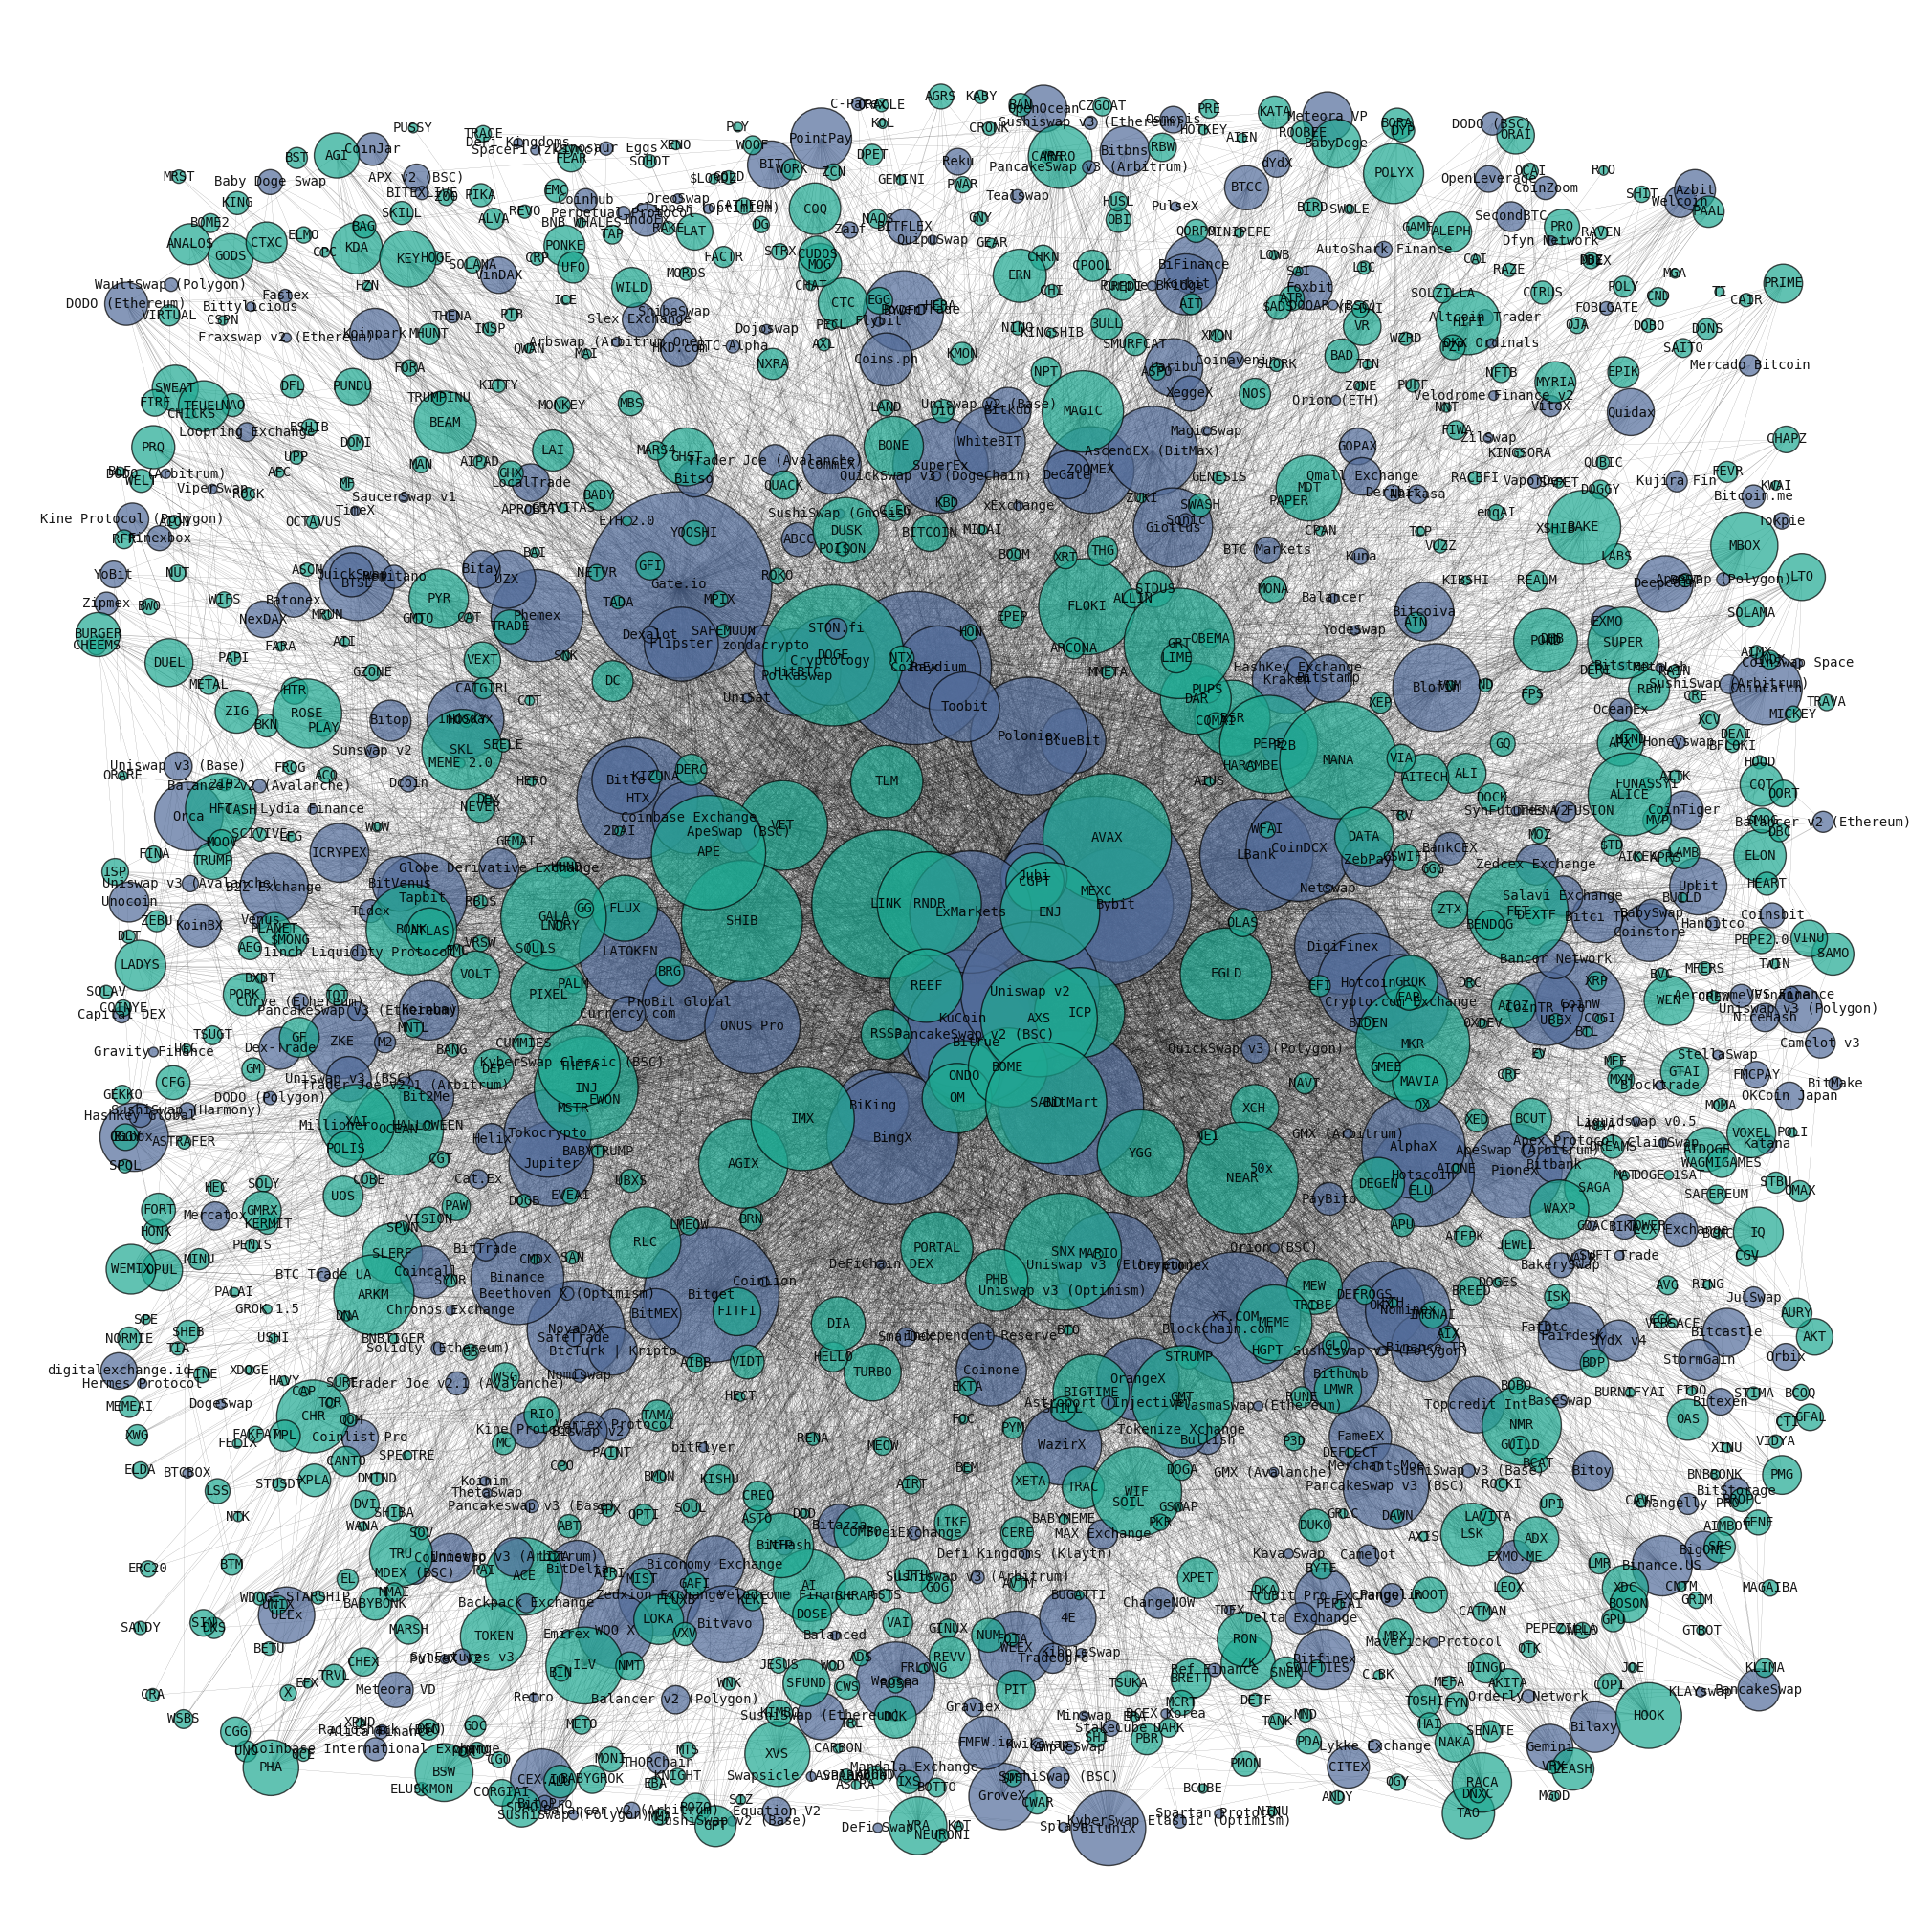

In [203]:
from pylab import rcParams
import numpy as np

# Set the size of the plot
rcParams["figure.figsize"] = 20, 20

# Get the position of the nodes
pos = nx.spring_layout(G, scale=20, k=10 / np.sqrt(G.order()), iterations=3)

# Get the degree of each node
d = dict(G.degree)

# Set the plot
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])

ax.axis("off")

nx.draw_networkx_nodes(
    G,
    pos,
    node_color=colors,
    node_size=[d[k] * 50 for k in d],
    alpha=0.7,
    edgecolors="black",
    margins=0,
)
nx.draw_networkx_labels(
    G,
    pos,
    font_size=10,
    font_color="black",
    clip_on=False,
    alpha=0.9,
    font_family="monospace",
)
nx.draw_networkx_edges(
    G,
    pos,
    width=0.15,
    style="-",
    edge_color="k",
    alpha=0.5,
)